<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 7

_**Group Members:**_ Ethan Goldberg, Noah Costa, Charlie Oestreicher

### Problem 0 (3 points)

## Part 1: The Bootstrap Sampler

### Problem 1.1

In [4]:
import numpy as np

def sample(n, shape, gen):
    # yes, this function could be one line,
    # but this is far more readable.
    m = np.prod(shape)
    random_integers = gen.choice(n, size=m, replace=True)
    result = random_integers.reshape(shape)
    return result

rng = np.random.default_rng(15)
sample(5, (2, 7), rng)

array([[4, 3, 3, 4, 1, 1, 1],
       [0, 2, 2, 4, 0, 4, 3]])

### Problem 1.2 (Exam Style)

$V_1 = \{0,1,5,6,8\}$

### Problem 1.3

When N = 10 and R = 10000:
  m_hat_M / N = 0.35
  sigma_hat_M / N = 0.1
  m_M / N = 0.35
  sigma_M / N = 0.15

When N = 31 and R = 10000:
  m_hat_M / N = 0.36
  sigma_hat_M / N = 0.056
  m_M / N = 0.36
  sigma_M / N = 0.086

When N = 100 and R = 10000:
  m_hat_M / N = 0.37
  sigma_hat_M / N = 0.031
  m_M / N = 0.37
  sigma_M / N = 0.048

When N = 316 and R = 10000:
  m_hat_M / N = 0.37
  sigma_hat_M / N = 0.017
  m_M / N = 0.37
  sigma_M / N = 0.027

When N = 1000 and R = 10000:
  m_hat_M / N = 0.37
  sigma_hat_M / N = 0.0099
  m_M / N = 0.37
  sigma_M / N = 0.015



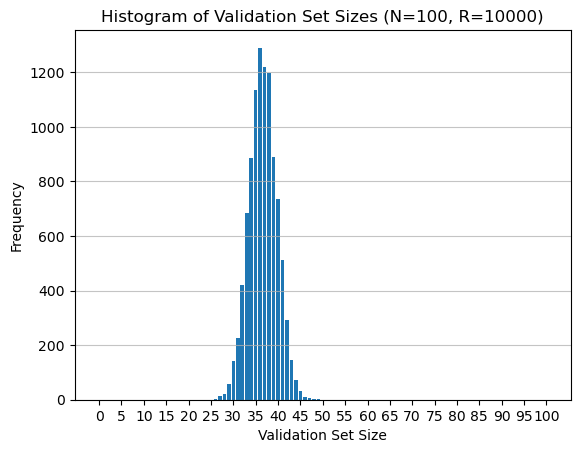

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bootstrap_validation_sets(N, R):
    rng = np.random.default_rng(15)
    training_bags = sample(N, (R, N), rng)
    training_set = np.arange(N)  # Create the original training set.
    validation_sets = [np.setdiff1d(training_set, training_bag) for training_bag in training_bags]
    validation_lengths = [len(validation_set) for validation_set in validation_sets]

    m_hat_M = np.mean(validation_lengths)
    sigma_hat_M = np.std(validation_lengths)
    
    p = (1-(1/N))**N
    m_M = p*N
    sigma_M = np.sqrt(N*p*(1-p))
    
    return validation_lengths, m_hat_M, sigma_hat_M, m_M, sigma_M

def show_graph(validation_lengths, N):
    plt.hist(validation_lengths, bins=range(N + 2), align='left', rwidth=0.8)
    plt.title(f'Histogram of Validation Set Sizes (N={N}, R={R})')
    plt.xlabel('Validation Set Size')
    plt.ylabel('Frequency')
    x_labels = range(0, N+1, 5)  # Labels every 10 units
    plt.xticks(x_labels)
    plt.grid(axis='y', alpha=0.75)

R = 10000
for N in np.logspace(1,3,num=5,dtype=int):
    validation_lengths, m_hat_M, sigma_hat_M, m_M, sigma_M = generate_bootstrap_validation_sets(N,R)
    print("{}\n{}\n{}\n{}\n{}\n".format(
        f"When N = {N} and R = {R}:", 
        f"  m_hat_M / N = {m_hat_M/N:.2g}", 
        f"  sigma_hat_M / N = {sigma_hat_M/N:.2g}",
        f"  m_M / N = {m_M/N:.2g}",
        f"  sigma_M / N = {sigma_M/N:.2g}"))
    if N == 100:
        show_graph(validation_lengths, N)

### Problem 1.4

### Problem 1.5 (Exam Style)

## Part 2: Cross-Validation with the Bootstrap

### Problem 2.1

In [7]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt
from time import time
from tqdm import tqdm

In [8]:
def experiment(c_range=np.logspace(-3, 3, num=20), n_folds=5):
    rng = np.random.default_rng(15)
    start = time()
    clf, val_acc, val_acc_variance, c_acc = bootstrap_validation(
        mnist.train, c_range, n_folds, rng
    )
    stop = time()
    test_accuracy = clf.score(mnist.test.x, mnist.test.y)

    print('time for bootstrap validation {:.1f} seconds'.format(stop - start))
    plt.figure()
    plt.semilogx(c_range, c_acc)
    plt.xlabel('C'), plt.ylabel('validation accuracy')
    print('best c: {:.4g}'.format(clf.C))
    print('validation accuracy and variance: {:.4g}, {:.4g}'.format(val_acc, val_acc_variance))
    print('test accuracy {:.4f}'.format(test_accuracy))
    plt.show()

In [9]:
import urllib.request
import ssl
from os import path as osp
import shutil

In [10]:
def retrieve(file_name, semester='fall23', homework=7):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [11]:
import pickle

file_name = 'mnist.pickle'
retrieve(file_name, homework=2)

with open(file_name, 'rb') as file:
    mnist = pickle.load(file)

Using previously downloaded file mnist.pickle


### Problem 2.2 (Exam Style)

## Part 3: Basics of Linear Support Vector Machines 

### Problem 3.1 (Exam Style)

## Part 4: Binary Linear SVMs and LRCs

### Problem 4.1 (Exam Style)

### Problem 4.2

In [14]:
balanced_file_name = 'balanced.pickle'
retrieve(balanced_file_name)

Using previously downloaded file balanced.pickle


In [15]:
with open(balanced_file_name, 'rb') as file:
    balanced_data = pickle.load(file)

In [16]:
def show_data(data, title):
    fs = 12
    x, y = data.x, data.y
    labels, colors = (-1, 1), ('r', 'b')
    for label, color in zip(labels, colors):
        k = y == label
        plt.plot(x[k, 0], x[k, 1], 'o' + color,
                 label='y = {}'.format(label), ms=3)
    plt.legend(fontsize=fs)
    plt.axis('equal')
    plt.axis('off')
    plt.title(title, fontsize=fs)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


def draw_line(b, w, style):
    xlim, ylim = plt.xlim(), plt.ylim()
    if np.abs(w[0]) > np.abs(w[1]):
        xs = np.array(xlim) + np.array([-1, 1])
        ys = (-b - w[0] * xs) / w[1]
    else:
        ys = np.array(ylim) + np.array([-1, 1])
        xs = (-b - w[1] * ys) / w[0]
    plt.plot(xs, ys, style, c='k')
    plt.xlim(xlim)
    plt.ylim(ylim)

Comments:
- (i) The datasets (train and test) are not linearly separable, and accuracy is therefore less than 100 percent.
- (ii) Both classifiers generalize well, and in fact achieve testing accuracy that is slightly _greater_ than their training accuracy.
- (iii) The two classifiers achieve equal performance on both the training set and the test set. Visually, they appear to compute the exact same boundary.

### Problem 4.3

In [25]:
imbalanced_file_name = 'imbalanced.pickle'
retrieve(imbalanced_file_name)

Using previously downloaded file imbalanced.pickle


In [26]:
with open(imbalanced_file_name, 'rb') as file:
    imbalanced_data = pickle.load(file)